# Computer Vision & Internet of Things @The Sparks Foundation

### Author : Digza Gandhi

#### Task 1 : Object Detection/Optical Character Recognition(ORC)

##### Problem Statement  : Implement an object detector which identifies the classes of the objects in an image or video.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")

In [3]:
classes = []
with open("./label.txt","r") as f:
          classes = f.read().splitlines()

In [4]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
len(classes)

80

In [6]:
img = cv2.imread("./dog,cat.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)

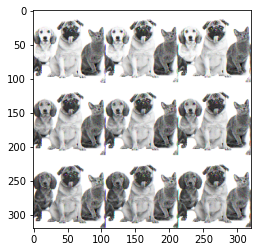

In [7]:
# to print image
i = blob[0].reshape(320,320,3)
height, width, channels = img.shape
plt.imshow(i)

In [8]:
yolo.setInput(blob)

In [9]:
layer_names = yolo.getLayerNames()

In [10]:
output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

In [11]:
outs = yolo.forward(output_layers)

In [12]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [13]:
len(boxes)

2

In [14]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [15]:
colors = np.random.uniform(0, 255, size = (len(classes), 3))

In [16]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,1/2, color, 2)

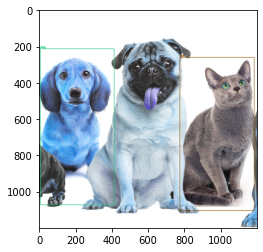

In [17]:
plt.imshow(img)

In [18]:
cv2.imwrite("./img.jpg", img)

True